In [22]:
import numpy as np
import geopandas
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt

In [16]:
county_conn = pd.read_pickle(r'C:\Users\mgm24\Documents\datasets\county_conn.pkl') 
sci_dist = pd.read_pickle(r'C:\Users\mgm24\Documents\datasets\sci_dist.pkl') 

In [11]:
county_conn.head()

,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg,center_long,center_lat,KMeans_cluster,Cluster
0,1.117710e-07,9.804210e-06,7.443744e-06,3.927421e-06,1.488184e-05,2.330883e-06,0.000001,0.000014,0.000009,0.000028,...,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100,-86.642748,32.534928,13,8
1,9.804210e-06,3.172975e-07,1.997443e-05,1.228879e-05,1.490024e-05,3.052969e-05,0.000006,0.000016,0.000025,0.000026,...,3,3 Rural/Semi-Rural,208563,475.934591,0.983336,100,-87.722575,30.727489,13,8
2,7.443744e-06,1.997443e-05,2.212110e-08,3.133912e-05,5.388512e-05,1.598885e-07,0.000004,0.000018,0.000006,0.000060,...,3,3 Rural/Semi-Rural,25965,139.162914,0.287527,100,-85.393213,31.869589,9,8
3,3.927421e-06,1.228879e-05,3.133912e-05,2.434424e-08,4.175470e-06,1.999440e-05,0.000008,0.000012,0.000028,0.000023,...,3,3 Rural/Semi-Rural,22643,51.047742,0.105471,100,-87.126480,32.998634,11,8
4,1.488184e-05,1.490024e-05,5.388512e-05,4.175470e-06,7.533211e-08,7.212926e-05,0.000034,0.000005,0.000038,0.000006,...,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100,-86.567383,33.980878,7,8


In [38]:
# PCA
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
proj = tsne.fit_transform(sci_dist)

C:\Users\mgm24\anaconda3\envs\DS_projects\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mgm24\anaconda3\envs\DS_projects\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


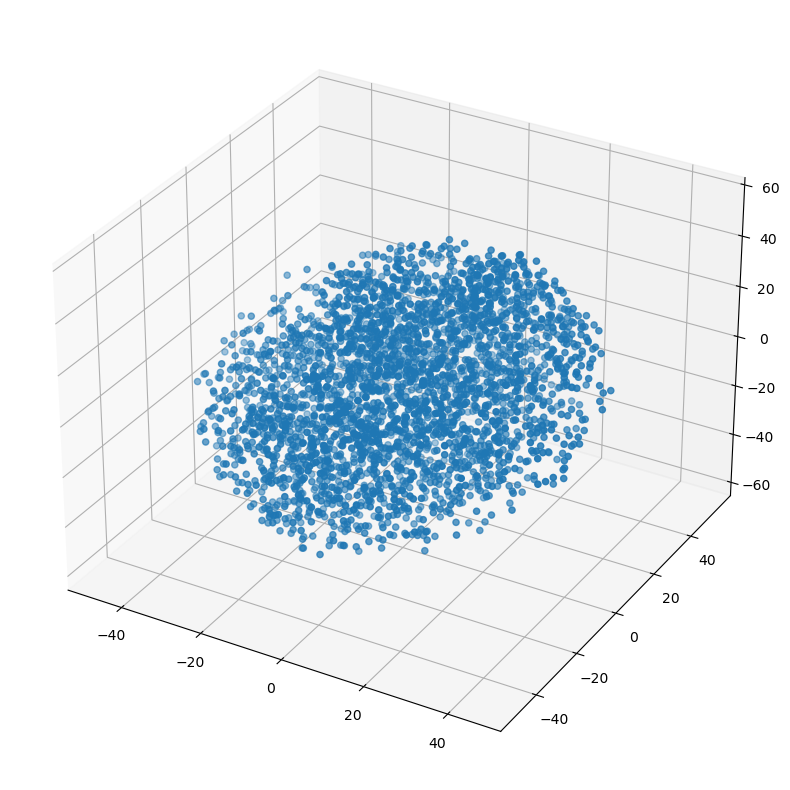

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(proj[:,0],proj[:,1],proj[:,2])

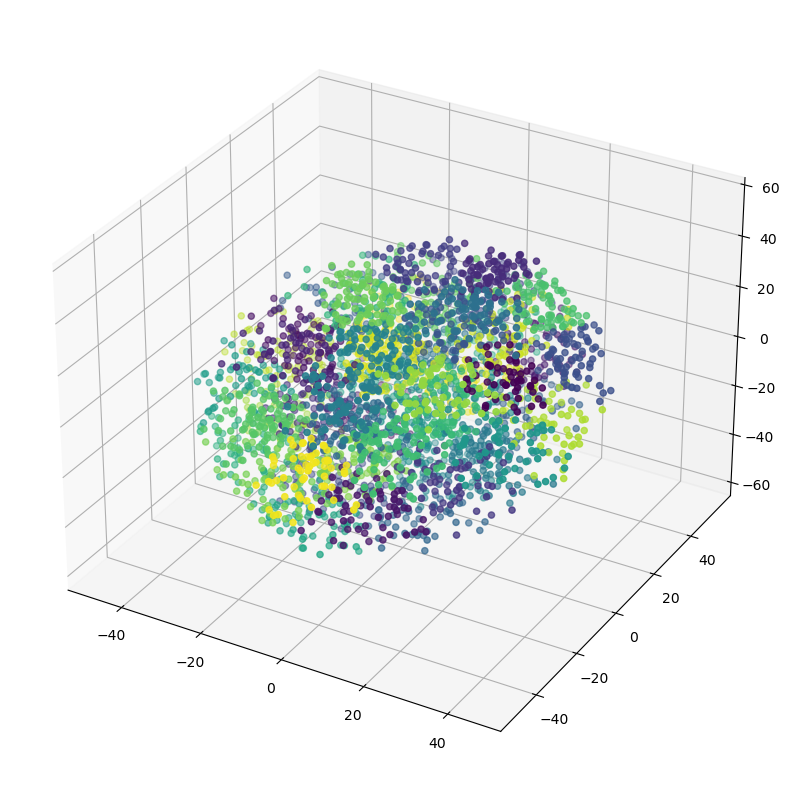

In [43]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=50, random_state=2022)
kmeans.fit(proj)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(proj[:,0],proj[:,1],proj[:,2], c=kmeans.labels_)

Text(0.5, 1.0, 'Social connectedness regions')

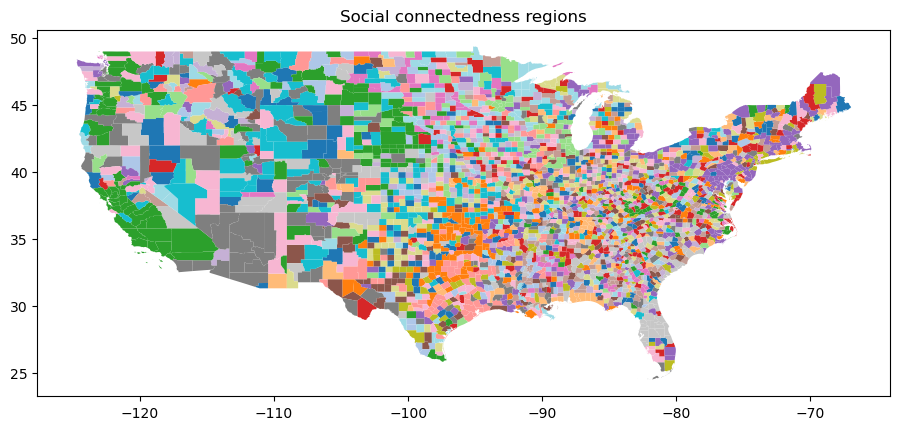

In [44]:
county_conn['Cluster'] = kmeans.labels_
county_conn.plot('Cluster', cmap='tab20', figsize=(11,10))
plt.title('Social connectedness regions')